## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Dataset

In [2]:
df = pd.read_excel('./ANZ synthesised transaction dataset.xlsx')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

## Confirming 100 unique customers existing in the dataset

In [5]:
df['account'].nunique()   # account ~ customers

100

## Selecting only the required features (Dropping the irrelevant ones)

In [6]:
df = df[['status', 'card_present_flag', 'balance', 'date',
            'gender', 'age','merchant_suburb', 'merchant_state',
            'amount', 'customer_id', 'movement']]
df['date'] = pd.to_datetime(df['date'])
df.head()

,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement
0,authorized,1.0,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit
1,authorized,0.0,21.20,2018-08-01,F,26,Sydney,NSW,14.19,CUS-2487424745,debit
2,authorized,1.0,5.71,2018-08-01,M,38,Sydney,NSW,6.42,CUS-2142601169,debit
3,authorized,1.0,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,CUS-1614226872,debit
4,authorized,1.0,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,debit


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   balance            12043 non-null  float64       
 3   date               12043 non-null  datetime64[ns]
 4   gender             12043 non-null  object        
 5   age                12043 non-null  int64         
 6   merchant_suburb    7717 non-null   object        
 7   merchant_state     7717 non-null   object        
 8   amount             12043 non-null  float64       
 9   customer_id        12043 non-null  object        
 10  movement           12043 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 1.0+ MB


## Exploratory Data Analysis (EDA)

### Total number of transactions made on each day

In [8]:
df['date'].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

### Total number of transactions made by each customer

In [9]:
df['customer_id'].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

### Transaction volume each day

In [20]:
df_date_count = df.groupby('date').count()

In [21]:
df_date_count.head()

,status,card_present_flag,balance,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement
date,,,,,,,,,,
2018-08-01,137,84,137,137,137,84,84,137,137,137
2018-08-02,152,99,152,152,152,99,99,152,152,152
2018-08-03,157,99,157,157,157,99,99,157,157,157
2018-08-04,118,94,118,118,118,94,94,118,118,118
2018-08-05,100,73,100,100,100,73,73,100,100,100


In [26]:
trans_vol = df_date_count['customer_id'].mean()
n_points = len(df_date_count.index)

In [27]:
n_points

91

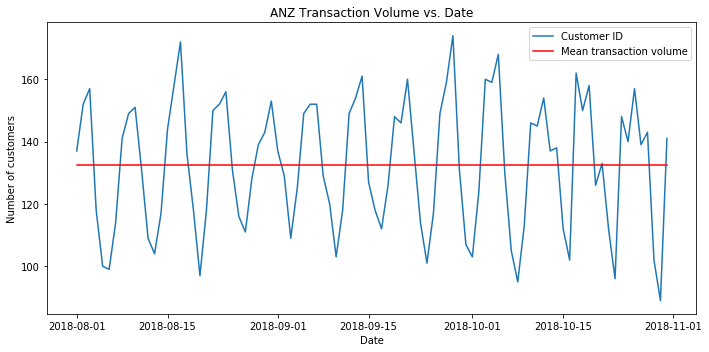

In [31]:
plt.figure(figsize = (10, 5))
plt.plot(df_date_count.index, df_date_count['customer_id'], label = 'Customer ID')
plt.plot(df_date_count.index, np.linspace(trans_vol,trans_vol,n_points), c = "r", label = 'Mean transaction volume')
plt.title("ANZ Transaction Volume vs. Date")
plt.xlabel("Date")
plt.ylabel("Number of customers")
plt.legend()
plt.tight_layout()

### Mean transaction amount each day

In [32]:
df_date_mean = df.groupby('date').mean()

In [34]:
df_date_mean.head()

,card_present_flag,balance,age,amount
date,,,,
2018-08-01,0.750000,9933.975328,30.233577,218.014161
2018-08-02,0.858586,13963.617895,31.493421,143.331053
2018-08-03,0.797980,10187.786688,31.751592,242.653376
2018-08-04,0.787234,8206.809407,31.033898,53.356356
2018-08-05,0.739726,13297.525400,29.910000,44.265000


In [35]:
trans_amt = df_date_mean['amount'].mean()
n_points = len(df_date_count.index)

In [36]:
n_points

91

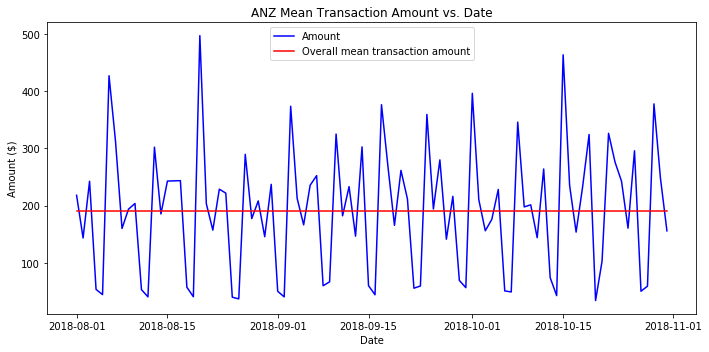

In [38]:
plt.figure(figsize = (10, 5))
plt.plot(df_date_count.index, df_date_mean['amount'], c = 'blue', label = 'Amount')
plt.plot(df_date_count.index, np.linspace(trans_amt,trans_amt,n_points), c = 'r', label = 'Overall mean transaction amount')
plt.title("ANZ Mean Transaction Amount vs. Date")
plt.xlabel("Date")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

In [46]:
months = []
for date in df['date']:
    if date.month == 8:
        months.append('August')
    elif date.month == 9:
        months.append('September')
    elif date.month == 10:
        months.append('October')

df['Months'] = months

In [55]:
df.head()

,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement,Months
0,authorized,1.0,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit,August
1,authorized,0.0,21.20,2018-08-01,F,26,Sydney,NSW,14.19,CUS-2487424745,debit,August
2,authorized,1.0,5.71,2018-08-01,M,38,Sydney,NSW,6.42,CUS-2142601169,debit,August
3,authorized,1.0,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,CUS-1614226872,debit,August
4,authorized,1.0,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,debit,August


### Mean customer balance and payment amount by customer_id in the month of August

In [54]:
df_cus_aug = df[df['Months'] == 'August'].groupby('customer_id').mean()
df_cus_aug.head()

,card_present_flag,balance,age,amount
customer_id,,,,
CUS-1005756958,0.857143,903.382800,53,122.788000
CUS-1117979751,0.785714,6750.908372,21,202.402326
CUS-1140341822,0.700000,2275.090000,28,294.950667
CUS-1147642491,0.764706,3768.855862,34,305.363103
CUS-1196156254,0.814815,17873.442805,34,179.216220


### Mean customer balance and payment amount by gender in the month of August

In [57]:
df_gen_aug = df[df['Months'] == 'August'].groupby('gender').mean()
df_gen_aug

,card_present_flag,balance,age,amount
gender,,,,
F,0.817684,7443.947172,30.428120,162.926567
M,0.792363,13906.689007,30.533757,205.742647


In [58]:
mean_f_bal_aug = df_gen_aug["balance"].iloc[0]   # female
mean_m_bal_aug = df_gen_aug["balance"].iloc[1]   # male
n_points = len(df_cus_aug["age"])

In [59]:
n_points

100

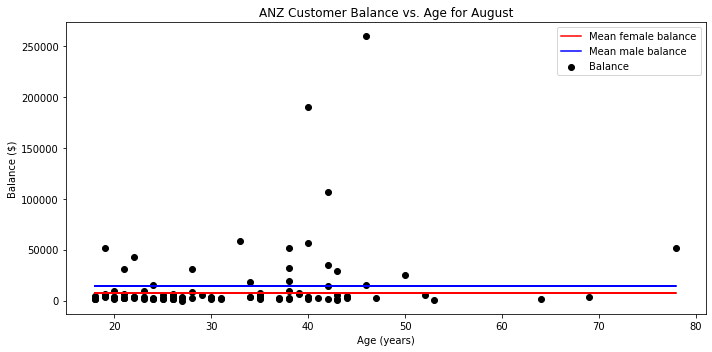

In [60]:
plt.figure(figsize = (10, 5))
plt.scatter(df_cus_aug["age"], df_cus_aug["balance"], c = "black", label = "Balance")
plt.plot(df_cus_aug["age"], np.linspace(mean_f_bal_aug, mean_f_bal_aug, n_points), c = "r", label = "Mean female balance")
plt.plot(df_cus_aug["age"], np.linspace(mean_m_bal_aug, mean_m_bal_aug, n_points), c = "b", label = "Mean male balance")
plt.title("ANZ Customer Balance vs. Age for August")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

In [61]:
mean_f_amt_aug = df_gen_aug["amount"].iloc[0]
mean_m_amt_aug = df_gen_aug["amount"].iloc[1]

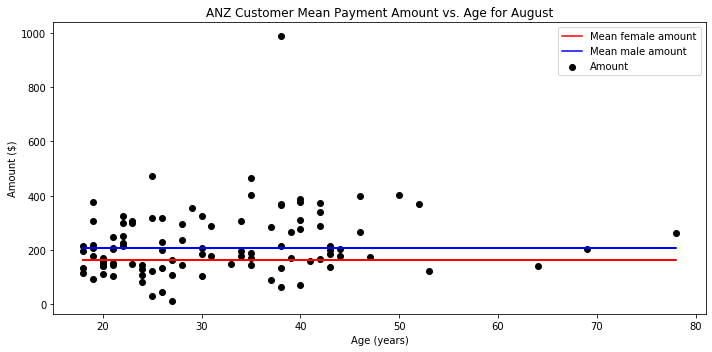

In [62]:
plt.figure(figsize = (10, 5))
plt.scatter(df_cus_aug["age"], df_cus_aug["amount"], c = "black", label = "Amount")
plt.plot(df_cus_aug["age"], np.linspace(mean_f_amt_aug,mean_f_amt_aug,n_points), c = "r", label = "Mean female amount")
plt.plot(df_cus_aug["age"], np.linspace(mean_m_amt_aug,mean_m_amt_aug,n_points), c = "b", label = "Mean male amount")
plt.title("ANZ Customer Mean Payment Amount vs. Age for August")
plt.xlabel("Age (years)")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

In [63]:
df_cus_sep = df[df["Months"] == "September"].groupby("customer_id").mean()
df_gen_sep = df[df["Months"] == "September"].groupby("gender").mean()

In [64]:
mean_f_bal_sep = df_gen_sep["balance"].iloc[0]
mean_m_bal_sep = df_gen_sep["balance"].iloc[1]
n_points = len(df_cus_sep["age"])

In [65]:
n_points

100

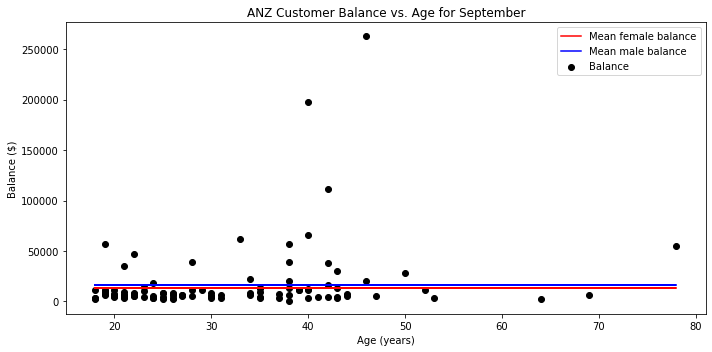

In [66]:
plt.figure(figsize = (10, 5))
plt.scatter(df_cus_sep["age"], df_cus_sep["balance"], c = "black", label = "Balance")
plt.plot(df_cus_sep["age"], np.linspace(mean_f_bal_sep,mean_f_bal_sep,n_points), c = "r", label = "Mean female balance")
plt.plot(df_cus_sep["age"], np.linspace(mean_m_bal_sep,mean_m_bal_sep,n_points), c = "b", label = "Mean male balance")
plt.title("ANZ Customer Balance vs. Age for September")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

In [67]:
mean_f_amt_sep = df_gen_sep["amount"].iloc[0]
mean_m_amt_sep = df_gen_sep["amount"].iloc[1]

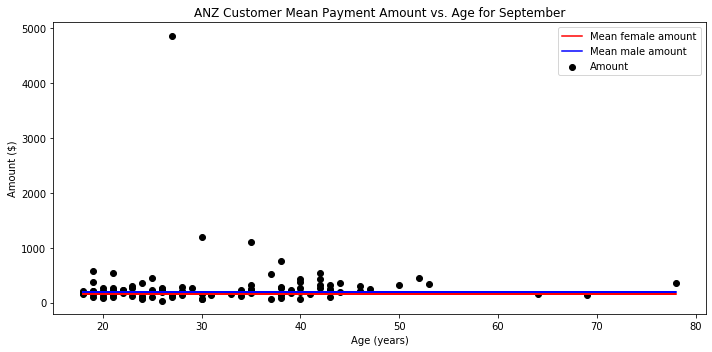

In [68]:
plt.figure(figsize = (10, 5))
plt.scatter(df_cus_sep["age"], df_cus_sep["amount"], c = "black", label = "Amount")
plt.plot(df_cus_sep["age"], np.linspace(mean_f_amt_sep,mean_f_amt_sep,n_points), c = "r", label = "Mean female amount")
plt.plot(df_cus_sep["age"], np.linspace(mean_m_amt_sep,mean_m_amt_sep,n_points), c = "b", label = "Mean male amount")
plt.title("ANZ Customer Mean Payment Amount vs. Age for September")
plt.xlabel("Age (years)")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

In [69]:
df_cus_oct = df[df["Months"] == "October"].groupby("customer_id").mean()
df_gen_oct = df[df["Months"] == "October"].groupby("gender").mean()

In [70]:
mean_f_bal_oct = df_gen_oct["balance"].iloc[0]
mean_m_bal_oct = df_gen_oct["balance"].iloc[1]
n_points = len(df_cus_oct["age"])

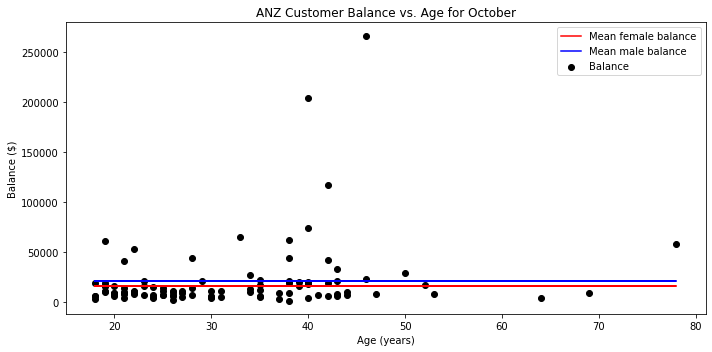

In [71]:
plt.figure(figsize = (10, 5))
plt.scatter(df_cus_oct["age"], df_cus_oct["balance"], c = "black", label = "Balance")
plt.plot(df_cus_oct["age"], np.linspace(mean_f_bal_oct,mean_f_bal_oct,n_points), c = "r", label = "Mean female balance")
plt.plot(df_cus_oct["age"], np.linspace(mean_m_bal_oct,mean_m_bal_oct,n_points), c = "b", label = "Mean male balance")
plt.title("ANZ Customer Balance vs. Age for October")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

In [72]:
mean_f_amt_oct = df_gen_oct["amount"].iloc[0]
mean_m_amt_oct = df_gen_oct["amount"].iloc[1]

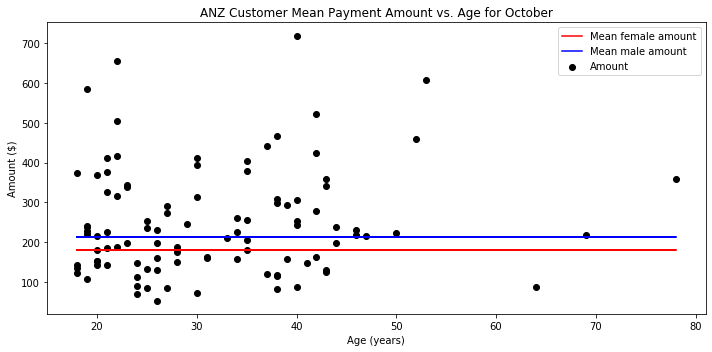

In [73]:
plt.figure(figsize = (10, 5))
plt.scatter(df_cus_oct["age"], df_cus_oct["amount"], c = "black", label = "Amount")
plt.plot(df_cus_oct["age"], np.linspace(mean_f_amt_oct,mean_f_amt_oct,n_points), c = "r", label = "Mean female amount")
plt.plot(df_cus_oct["age"], np.linspace(mean_m_amt_oct,mean_m_amt_oct,n_points), c = "b", label = "Mean male amount")
plt.title("ANZ Customer Mean Payment Amount vs. Age for October")
plt.xlabel("Age (years)")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()